In [21]:
from fastbook import *

In [22]:

API_KEY = "57b93ec1d812051ed0177a5b0d98e61526f1c2b70f9160dc35c9752df0145d29"

Generating bird image (using google's serpapi)

In [23]:
from serpapi import GoogleSearch

def search_images_serpapi(term, max_images=200):
    params = {
        "engine": "google_images",
        "q": term,
        "api_key": {API_KEY}
    }
    search = GoogleSearch(params)
    results = search.get_dict()
    return [img['original'] for img in results.get("images_results", [])[:max_images]]




In [24]:
myList = search_images_serpapi("bird photos")
print(myList[3])

https://images.unsplash.com/photo-1606567595334-d39972c85dbe?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8YmlyZHxlbnwwfHwwfHx8MA%3D%3D


In [30]:
import requests
#requests.get("https://duckduckgo.com").status_code

##check number of searches left
url = f"https://serpapi.com/account?api_key={API_KEY}"
res = requests.get(url)
data = res.json()
print(data)  # See the actual response from SerpAPI


{'account_id': '689ca680a8908726cb36dc2c', 'api_key': '57b93ec1d812051ed0177a5b0d98e61526f1c2b70f9160dc35c9752df0145d29', 'account_email': 'mohammedamoshood@gmail.com', 'account_status': 'Active', 'plan_id': 'free', 'plan_name': 'Free Plan', 'plan_monthly_price': 0.0, 'searches_per_month': 250, 'plan_searches_left': 240, 'extra_credits': 0, 'total_searches_left': 240, 'this_month_usage': 10, 'this_hour_searches': 2, 'last_hour_searches': 1, 'account_rate_limit_per_hour': 250}


Saving bird image as a project file. (using the Path() and download_url() functions)

In [26]:
dest = Path('bird0001.jpg')
if not dest.exists() : download_url(myList[0], dest=dest, show_progress=False)

Displaying image direct from on jupyter (using Image.open())

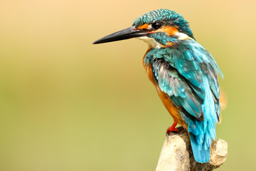

In [27]:
im = Image.open(dest)
im.to_thumb(256,256)

Function to Download random forest and bird pictures (serpAPI)

In [29]:
searches = 'forest', 'bird'
dest2 = Path('bird_or_not')


if not dest2.exists():
    dest2.mkdir()
    for o in searches:
        myDest = (dest2/o)
        myDest.mkdir(parents=True, exist_ok=True)
        myPics = search_images_serpapi(f"{o} photo")
        download_images(myDest,urls=myPics[:200])
        resize_images(myDest,max_size=400, dest = myDest)
        

Verifying images for any corruption

In [31]:
failure = verify_images(get_image_files(dest2))
failure.map(Path.unlink)

(#3) [None,None,None]